In [1]:
import pandas as pd
import os
import numpy as np
import time
import tensorflow.keras.initializers
import statistics
import tensorflow.keras as keras
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, InputLayer
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ShuffleSplit
from tensorflow.keras.layers import ReLU
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [5]:
1.58e7

15800000.0

In [6]:
20000

20000

In [3]:
# Data directly taken from PDF
Ebins = np.array([1.00E-03,2.15E-03,4.64E-03,1.00E-02,2.15E-02,4.64E-02,1.00E-01,2.15E-01,4.64E-01,1.00E+00,2.15E+00,4.64E+00,1.00E+01,2.15E+01,4.64E+01,1.00E+02,2.15E+02,4.64E+02,1.00E+03,2.15E+03,4.64E+03,1.00E+04,1.25E+04,1.58E+04,1.99E+04,2.51E+04,3.16E+04,3.98E+04,5.01E+04,6.30E+04,7.94E+04,1.00E+05,1.25E+05,1.58E+05,1.99E+05,2.51E+05,3.16E+05,3.98E+05,5.01E+05,6.30E+05,7.94E+05,1.00E+06,1.25E+06,1.58E+06,1.99E+06,2.51E+06,3.16E+06,3.98E+06,5.01E+06,6.30E+06,7.94E+06,1.00E+07,1.58E+07])

cm = np.array([
[6.11E+00,5.60E+00,4.80E+00,3.89E+00,3.03E+00,2.27E+00,1.64E+00,1.17E+00,8.20E-01,5.72E-01,3.94E-01,2.73E-01,1.90E-01,1.28E-01,8.88E-02,6.02E-02,4.05E-02,2.79E-02,1.91E-02,1.27E-02,9.01E-03,6.86E-03,6.24E-03,5.62E-03,4.99E-03,4.37E-03,3.83E-03,3.36E-03,2.90E-03,2.43E-03,1.97E-03,1.64E-03,1.47E-03,1.31E-03,1.15E-03,9.96E-04,8.95E-04,8.61E-04,8.28E-04,7.94E-04,7.60E-04,7.22E-04,6.79E-04,6.37E-04,5.94E-04,5.51E-04,4.94E-04,4.19E-04,3.44E-04,2.70E-04,1.97E-04,1.39E-04,1.00E-04],
[7.36E-01,8.08E-01,9.34E-01,1.12E+00,1.36E+00,1.72E+00,2.11E+00,2.38E+00,2.47E+00,2.46E+00,2.37E+00,2.24E+00,2.04E+00,1.85E+00,1.65E+00,1.47E+00,1.30E+00,1.14E+00,1.01E+00,8.83E-01,7.64E-01,6.98E-01,6.69E-01,6.39E-01,6.09E-01,5.81E-01,5.54E-01,5.26E-01,4.99E-01,4.71E-01,4.41E-01,4.09E-01,3.77E-01,3.45E-01,3.13E-01,2.81E-01,2.49E-01,2.17E-01,1.87E-01,1.59E-01,1.34E-01,1.11E-01,9.38E-02,7.58E-02,5.80E-02,4.42E-02,3.52E-02,2.63E-02,1.95E-02,1.52E-02,1.10E-02,7.43E-03,4.65E-03],
[5.98E-01,6.57E-01,7.58E-01,9.00E-01,1.08E+00,1.42E+00,1.89E+00,2.27E+00,2.51E+00,2.65E+00,2.69E+00,2.67E+00,2.58E+00,2.45E+00,2.29E+00,2.14E+00,1.98E+00,1.83E+00,1.67E+00,1.53E+00,1.39E+00,1.31E+00,1.27E+00,1.23E+00,1.20E+00,1.16E+00,1.13E+00,1.09E+00,1.05E+00,1.02E+00,9.77E-01,9.33E-01,8.87E-01,8.35E-01,7.78E-01,7.19E-01,6.57E-01,5.94E-01,5.27E-01,4.61E-01,3.96E-01,3.39E-01,2.90E-01,2.42E-01,1.94E-01,1.54E-01,1.24E-01,9.54E-02,7.21E-02,5.66E-02,4.15E-02,2.81E-02,1.77E-02],
[5.01E-01,5.50E-01,6.34E-01,7.50E-01,9.18E-01,1.22E+00,1.62E+00,2.00E+00,2.31E+00,2.52E+00,2.66E+00,2.75E+00,2.75E+00,2.71E+00,2.63E+00,2.53E+00,2.41E+00,2.30E+00,2.18E+00,2.04E+00,1.92E+00,1.84E+00,1.81E+00,1.78E+00,1.74E+00,1.71E+00,1.67E+00,1.64E+00,1.61E+00,1.57E+00,1.53E+00,1.49E+00,1.44E+00,1.38E+00,1.32E+00,1.25E+00,1.17E+00,1.09E+00,9.97E-01,8.96E-01,7.96E-01,6.97E-01,6.02E-01,5.13E-01,4.24E-01,3.47E-01,2.85E-01,2.24E-01,1.77E-01,1.49E-01,1.21E-01,7.95E-02,4.26E-02],
[4.15E-01,4.55E-01,5.24E-01,6.18E-01,7.61E-01,1.01E+00,1.36E+00,1.72E+00,2.04E+00,2.27E+00,2.45E+00,2.58E+00,2.64E+00,2.67E+00,2.66E+00,2.63E+00,2.58E+00,2.51E+00,2.43E+00,2.35E+00,2.26E+00,2.21E+00,2.18E+00,2.15E+00,2.13E+00,2.10E+00,2.08E+00,2.06E+00,2.04E+00,2.02E+00,1.99E+00,1.95E+00,1.92E+00,1.88E+00,1.83E+00,1.77E+00,1.70E+00,1.61E+00,1.51E+00,1.38E+00,1.26E+00,1.13E+00,1.00E+00,8.67E-01,7.33E-01,6.13E-01,5.10E-01,4.08E-01,3.30E-01,2.80E-01,2.30E-01,1.55E-01,8.39E-02],
[3.43E-01,3.75E-01,4.31E-01,5.11E-01,6.31E-01,8.34E-01,1.12E+00,1.43E+00,1.72E+00,1.95E+00,2.13E+00,2.29E+00,2.39E+00,2.46E+00,2.50E+00,2.51E+00,2.52E+00,2.52E+00,2.47E+00,2.44E+00,2.39E+00,2.36E+00,2.35E+00,2.34E+00,2.33E+00,2.32E+00,2.31E+00,2.31E+00,2.30E+00,2.29E+00,2.28E+00,2.27E+00,2.26E+00,2.24E+00,2.22E+00,2.19E+00,2.13E+00,2.07E+00,1.97E+00,1.86E+00,1.73E+00,1.59E+00,1.42E+00,1.25E+00,1.08E+00,9.20E-01,7.60E-01,6.27E-01,5.14E-01,4.09E-01,3.03E-01,2.25E-01,1.40E-01],
[2.80E-01,3.07E-01,3.53E-01,4.23E-01,5.13E-01,6.91E-01,9.32E-01,1.18E+00,1.41E+00,1.62E+00,1.81E+00,1.95E+00,2.07E+00,2.18E+00,2.24E+00,2.29E+00,2.32E+00,2.34E+00,2.36E+00,2.36E+00,2.33E+00,2.33E+00,2.33E+00,2.33E+00,2.34E+00,2.34E+00,2.35E+00,2.37E+00,2.38E+00,2.39E+00,2.41E+00,2.43E+00,2.44E+00,2.46E+00,2.47E+00,2.47E+00,2.44E+00,2.40E+00,2.33E+00,2.23E+00,2.10E+00,1.98E+00,1.82E+00,1.63E+00,1.45E+00,1.26E+00,1.07E+00,8.88E-01,7.36E-01,6.29E-01,5.22E-01,3.61E-01,2.04E-01],
[1.85E-01,2.05E-01,2.34E-01,2.79E-01,3.42E-01,4.57E-01,6.16E-01,7.74E-01,9.38E-01,1.08E+00,1.22E+00,1.34E+00,1.44E+00,1.52E+00,1.61E+00,1.69E+00,1.74E+00,1.80E+00,1.87E+00,1.90E+00,1.92E+00,1.96E+00,1.98E+00,2.00E+00,2.02E+00,2.05E+00,2.08E+00,2.12E+00,2.16E+00,2.20E+00,2.25E+00,2.31E+00,2.37E+00,2.43E+00,2.50E+00,2.57E+00,2.62E+00,2.66E+00,2.68E+00,2.67E+00,2.61E+00,2.53E+00,2.42E+00,2.25E+00,2.06E+00,1.82E+00,1.57E+00,1.36E+00,1.16E+00,9.63E-01,7.98E-01,5.95E-01,3.53E-01],
[1.18E-01,1.30E-01,1.52E-01,1.79E-01,2.13E-01,2.91E-01,3.95E-01,5.07E-01,6.09E-01,7.04E-01,7.92E-01,8.66E-01,9.43E-01,1.02E+00,1.08E+00,1.14E+00,1.20E+00,1.25E+00,1.31E+00,1.37E+00,1.42E+00,1.46E+00,1.48E+00,1.50E+00,1.53E+00,1.55E+00,1.58E+00,1.62E+00,1.67E+00,1.73E+00,1.80E+00,1.87E+00,1.95E+00,2.05E+00,2.15E+00,2.27E+00,2.41E+00,2.52E+00,2.59E+00,2.65E+00,2.70E+00,2.71E+00,2.67E+00,2.58E+00,2.44E+00,2.25E+00,2.02E+00,1.78E+00,1.55E+00,1.31E+00,1.07E+00,8.07E-01,5.25E-01],
[7.19E-02,8.04E-02,9.38E-02,1.13E-01,1.40E-01,1.84E-01,2.52E-01,3.21E-01,3.84E-01,4.42E-01,5.04E-01,5.58E-01,6.06E-01,6.49E-01,6.77E-01,7.23E-01,7.85E-01,8.28E-01,8.73E-01,9.13E-01,9.47E-01,9.90E-01,1.01E+00,1.04E+00,1.06E+00,1.08E+00,1.12E+00,1.16E+00,1.21E+00,1.25E+00,1.32E+00,1.38E+00,1.46E+00,1.56E+00,1.68E+00,1.80E+00,1.95E+00,2.08E+00,2.22E+00,2.35E+00,2.47E+00,2.57E+00,2.65E+00,2.64E+00,2.54E+00,2.38E+00,2.16E+00,2.01E+00,1.87E+00,1.62E+00,1.31E+00,1.02E+00,6.80E-01],
[3.63E-02,4.04E-02,4.84E-02,5.66E-02,6.52E-02,8.84E-02,1.21E-01,1.55E-01,1.90E-01,2.19E-01,2.43E-01,2.75E-01,2.99E-01,3.16E-01,3.39E-01,3.64E-01,3.90E-01,4.13E-01,4.36E-01,4.68E-01,5.00E-01,5.23E-01,5.34E-01,5.45E-01,5.56E-01,5.70E-01,5.91E-01,6.15E-01,6.37E-01,6.64E-01,7.03E-01,7.52E-01,8.14E-01,8.93E-01,9.84E-01,1.08E+00,1.21E+00,1.35E+00,1.52E+00,1.69E+00,1.88E+00,2.06E+00,2.22E+00,2.35E+00,2.41E+00,2.36E+00,2.22E+00,2.13E+00,2.03E+00,1.80E+00,1.56E+00,1.24E+00,8.69E-01],
[2.72E-02,3.05E-02,3.71E-02,4.49E-02,5.41E-02,6.96E-02,9.36E-02,1.26E-01,1.48E-01,1.70E-01,1.92E-01,2.18E-01,2.33E-01,2.37E-01,2.65E-01,2.89E-01,3.08E-01,3.26E-01,3.46E-01,3.70E-01,3.83E-01,4.06E-01,4.22E-01,4.38E-01,4.53E-01,4.69E-01,4.83E-01,4.97E-01,5.10E-01,5.29E-01,5.61E-01,6.09E-01,6.70E-01,7.43E-01,8.24E-01,9.19E-01,1.03E+00,1.14E+00,1.29E+00,1.46E+00,1.66E+00,1.85E+00,2.02E+00,2.19E+00,2.30E+00,2.29E+00,2.18E+00,2.10E+00,2.03E+00,1.82E+00,1.60E+00,1.31E+00,9.15E-01],
[1.05E-02,1.11E-02,1.29E-02,1.55E-02,1.94E-02,2.79E-02,3.72E-02,4.61E-02,5.23E-02,5.95E-02,7.00E-02,7.80E-02,8.42E-02,8.85E-02,9.14E-02,1.01E-01,1.17E-01,1.20E-01,1.28E-01,1.34E-01,1.43E-01,1.46E-01,1.54E-01,1.62E-01,1.66E-01,1.65E-01,1.67E-01,1.73E-01,1.87E-01,2.06E-01,2.26E-01,2.40E-01,2.54E-01,2.84E-01,3.25E-01,3.79E-01,4.50E-01,5.37E-01,6.52E-01,7.77E-01,9.34E-01,1.12E+00,1.32E+00,1.51E+00,1.68E+00,1.77E+00,1.77E+00,1.88E+00,1.98E+00,1.89E+00,1.68E+00,1.43E+00,1.05E+00],
[1.65E-03,2.14E-03,2.62E-03,3.40E-03,4.49E-03,5.06E-03,6.08E-03,8.28E-03,1.04E-02,1.26E-02,1.46E-02,1.60E-02,1.70E-02,1.80E-02,2.01E-02,2.21E-02,2.39E-02,2.40E-02,2.27E-02,2.46E-02,2.65E-02,2.94E-02,3.12E-02,3.30E-02,3.48E-02,3.63E-02,3.72E-02,3.78E-02,3.84E-02,4.01E-02,4.48E-02,5.09E-02,5.71E-02,6.37E-02,7.14E-02,8.52E-02,1.06E-01,1.32E-01,1.73E-01,2.28E-01,3.12E-01,4.31E-01,5.70E-01,7.23E-01,8.93E-01,1.03E+00,1.11E+00,1.31E+00,1.55E+00,1.59E+00,1.52E+00,1.40E+00,1.09E+00],
[4.83E-04,4.94E-04,5.05E-04,6.48E-04,9.25E-04,1.11E-03,1.21E-03,1.33E-03,1.45E-03,1.63E-03,1.87E-03,2.12E-03,3.00E-03,4.46E-03,4.11E-03,3.78E-03,3.54E-03,3.66E-03,4.27E-03,4.84E-03,5.42E-03,6.01E-03,6.35E-03,6.69E-03,7.03E-03,7.31E-03,7.49E-03,7.62E-03,7.76E-03,7.97E-03,8.39E-03,9.16E-03,1.03E-02,1.20E-02,1.42E-02,1.83E-02,2.47E-02,3.10E-02,4.07E-02,5.80E-02,8.93E-02,1.39E-01,2.08E-01,3.07E-01,4.30E-01,5.79E-01,7.51E-01,9.22E-01,1.10E+00,1.22E+00,1.25E+00,1.22E+00,1.08E+00]])

In [4]:
Ebins

array([1.00e-03, 2.15e-03, 4.64e-03, 1.00e-02, 2.15e-02, 4.64e-02,
       1.00e-01, 2.15e-01, 4.64e-01, 1.00e+00, 2.15e+00, 4.64e+00,
       1.00e+01, 2.15e+01, 4.64e+01, 1.00e+02, 2.15e+02, 4.64e+02,
       1.00e+03, 2.15e+03, 4.64e+03, 1.00e+04, 1.25e+04, 1.58e+04,
       1.99e+04, 2.51e+04, 3.16e+04, 3.98e+04, 5.01e+04, 6.30e+04,
       7.94e+04, 1.00e+05, 1.25e+05, 1.58e+05, 1.99e+05, 2.51e+05,
       3.16e+05, 3.98e+05, 5.01e+05, 6.30e+05, 7.94e+05, 1.00e+06,
       1.25e+06, 1.58e+06, 1.99e+06, 2.51e+06, 3.16e+06, 3.98e+06,
       5.01e+06, 6.30e+06, 7.94e+06, 1.00e+07, 1.58e+07])

# For Using Bayesian Optimization on Various Types of Data

In [111]:
def getModel(numNeurons0, numNeurons1, numNeurons2, numNeurons3, alpha0, alpha1, alpha2, alpha3, dropout):
    
    numNeurons0 = int(numNeurons0)
    numNeurons1 = int(numNeurons1)
    numNeurons2 = int(numNeurons2)
    numNeurons3 = int(numNeurons3)
 
    model = keras.Sequential()
    
    model.add(keras.Input(15))
    
    if numNeurons0 >= 1:
        model.add(Dropout(dropout))
        model.add(Dense(numNeurons0, activation=keras.layers.LeakyReLU(alpha=alpha0)))
    if numNeurons1 >= 1:
        model.add(Dropout(dropout))
        model.add(Dense(numNeurons1, activation=keras.layers.LeakyReLU(alpha=alpha1)))
    if numNeurons2 >= 1:
        model.add(Dropout(dropout))
        model.add(Dense(numNeurons2, activation=keras.layers.LeakyReLU(alpha=alpha2)))
    if numNeurons3 >= 1:
        model.add(Dropout(dropout))
        model.add(Dense(numNeurons3, activation=keras.layers.LeakyReLU(alpha=alpha3)))
   
    model.add(Dense(53, activation='linear'))
    
    return model


def getMeanError(numNeurons0, numNeurons1, numNeurons2, numNeurons3, alpha0, alpha1, alpha2, alpha3, dropout, lr, dataSource, retMore = False):
    
    x,y = dataSource()
    
    # Splits the data into 3 folds for bootstrapping
    SPLITS = 1
    boot = ShuffleSplit(n_splits = SPLITS, test_size=0.1, random_state=42)
    
    # Track the progress
    benchmarks = []
    epochs_needed = []
    num = 0
    
    model = None
    
    # Bootstrap the data for mean error
    for train, test in boot.split(x):
                
        # Compile model
        model = getModel(numNeurons0, numNeurons1, numNeurons2, numNeurons3, alpha0, alpha1, alpha2, alpha3, dropout)
        model.compile(loss = "mse", optimizer = Adam(lr=lr) )
        
        # Sets up early stopping
        monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, 
                                patience=150, verbose=0,
                                mode='min', restore_best_weights=True)
        
        # Split test and train data
        xtrain = x[train]
        xtest = x[test]

        ytrain = y[train]
        ytest = y[test]
            
        # Fits to the bootstrap data
        model.fit(xtrain,ytrain,validation_data=(xtest,ytest),batch_size=120,callbacks=[monitor],verbose=0,epochs=10000)

        # Gets the epochs needed to converge
        epochs_needed.append(monitor.stopped_epoch)
        
        # Checks how well the test data was fit
        if retMore:
            xtest, ytest = loadXY()
        ypred = model(xtest)
        score = metrics.mean_squared_error(ytest, ypred)
        benchmarks.append(score)
        
    mean_benchmark = np.mean(benchmarks)
    std_benchmark = np.std(benchmarks)
    mean_epochs = np.mean(epochs_needed)
    
    if retMore:
        return mean_benchmark, std_benchmark, model
    else:
        print("Score : " , mean_benchmark, " ± ", std_benchmark, " Epochs Needed : " , mean_epochs)
        return -mean_benchmark
        

# Training NN on Mono-Energetic Data

In [349]:
# Optimizes the Neural Network using convoluted monoenergetic data, to simulate
# the monoenergetic data of the Geant4 Simulations

pbounds = { "numNeurons0" : (0, 300),
            "numNeurons1" : (0, 300),
            "numNeurons2" : (0, 300),
            "numNeurons3" : (0, 300),
            "alpha0"      : (0, 0.9),
            "alpha1"      : (0, 0.9),
            "alpha2"      : (0, 0.9),
            "alpha3"      : (0, 0.9),
            "dropout"     : (0, 0.05),
            "lr"          : (0, 0.05) }

def convolutedMonoData(numNeurons0, numNeurons1, numNeurons2, numNeurons3, alpha0, alpha1, alpha2, alpha3, dropout, lr):
    return getMeanError(numNeurons0, numNeurons1, numNeurons2, numNeurons3, alpha0, alpha1, alpha2, alpha3, dropout, lr, loadRandomGaussianMonoData)

optimizer = BayesianOptimization(
    f=convolutedMonoData,
    pbounds=pbounds,
    verbose=2,
    random_state=1
)

optimizer.maximize(init_points=100, n_iter=100)

print("Best Value : " , optimizer.max)

|   iter    |  target   |  alpha0   |  alpha1   |  alpha2   |  alpha3   |  dropout  |    lr     | numNeu... | numNeu... | numNeu... | numNeu... |
-------------------------------------------------------------------------------------------------------------------------------------------------
Score :  0.001346620834513558  ±  0.00033440234609357706  Epochs Needed :  347.6
|  1        | -0.001347 |  0.3753   |  0.6483   |  0.000102 |  0.2721   |  0.007338 |  0.004617 |  55.88    |  103.7    |  119.0    |  161.6    |
Score :  0.007662438283426688  ±  0.0034872800513473393  Epochs Needed :  1133.4
|  2        | -0.007662 |  0.3773   |  0.6167   |  0.184    |  0.7903   |  0.001369 |  0.03352  |  125.2    |  167.6    |  42.12    |  59.43    |
Score :  0.0096199315169988  ±  0.006302024147402533  Epochs Needed :  1176.0
|  3        | -0.00962  |  0.7207   |  0.8714   |  0.2821   |  0.6231   |  0.04382  |  0.04473  |  25.51    |  11.72    |  50.95    |  263.4    |
Score :  0.003589417161538019 

KeyboardInterrupt: 

In [367]:
Best = optimizer.max["params"]

Best = {'alpha0': 0.28210764148407524, 'alpha1': 0.6657408429219889, 'alpha2': 0.4021037952966369, 'alpha3': 0.7334811086797178, 'dropout': 0.02695982872332456, 'lr': 0.024293825500635684, 'numNeurons0': 160.31725839678703, 'numNeurons1': 106.05216409403064, 'numNeurons2': 250.90902140652136, 'numNeurons3': 189.54141751685398}

numNeurons0 = Best["numNeurons0"]
numNeurons1 = Best["numNeurons1"]
numNeurons2 = Best["numNeurons2"]
numNeurons3 = Best["numNeurons3"]
dropout = Best["dropout"]
lr = Best["lr"]
alpha0 = Best["alpha0"]
alpha1 = Best["alpha1"]
alpha2 = Best["alpha2"]
alpha3 = Best["alpha3"]

In [437]:
int( np.rint( np.abs( np.random.normal(loc = 10, scale = 6))) )

8

# Methods for Getting Various Data

In [5]:
# Loads the real-world data from IAS tecdoc
def loadXY():

    '''
    Can't figure out how to pass non-optimiziable variable to the bayes opt
    module. Just load them from pickle everytime in evaluate_network()
    '''
    unfolding_data = pd.read_pickle("ANN_intro_James/data/unfolding_data.pkl")

    X = np.zeros((251,15))
    Y = np.zeros((251,53))
    for row in range(251):
    
    
        X[row,:] = unfolding_data['Detector Response'][row]
        Y[row,:] = unfolding_data['Spectrum'][row][0:53]
    
    return X,Y

# Uses the detector response matrix to generate monoenergetic data, 
# and all possible convolutions of two monoenergetic data
def loadConvolutedMonoData():
    
    # All of the neutron spectra are multiplied by fluences
    fluences = np.zeros(53)
    for i in range(53):
        temp = np.append(Ebins, [2.51E+07])
        fluences[i] = np.log(temp[i + 1]) - np.log(temp[i])
        
    x = np.zeros( (0, 15) )
    y = np.zeros( (0, 53) )
    
    # Get all mono-energetic and double-energetic data
    for i in range(53):
        for j in range(53):
            yRow = np.zeros(53)

            yRow[i] += 0.5
            yRow[j] += 0.5

            xRow = np.matmul(cm, yRow)
            yRow = yRow / fluences

            x = np.vstack( (x, xRow) )
            y = np.vstack( (y, yRow) )    
    
    return x,y

def loadRandomData():
    
    # All of the neutron spectra are multiplied by fluences
    fluences = np.zeros(53)
    for i in range(53):
        temp = np.append(Ebins, [2.51E+07])
        fluences[i] = np.log(temp[i + 1]) - np.log(temp[i])
        
    x = np.zeros( (0, 15) )
    y = np.zeros( (0, 53) )
    
    # Get all mono-energetic and double-energetic data
    for _ in range(5 * 53 * 53):
        yRow = np.random.random(53)
        yRow = yRow / sum(yRow)

        xRow = np.matmul(cm, yRow)
        yRow = yRow / fluences

        x = np.vstack( (x, xRow) )
        y = np.vstack( (y, yRow) )    
    
    return x,y

#
def loadGaussianMonoData():
    # Randomly adds a gaussian peak to a 1D array
    def addGaussian(data, i):
        # Randomly picks the width and height of the gaussian
        # ~8 is placeholder for typical width of peak in the real-world data (depends on detector resolution)
        W = np.random.randint(low = 1, high = 20)
        H = np.abs( np.random.normal(loc = 100, scale = 30) )

        for k in range(-W, W + 1):
            if (i + k) >= len(data):
                break
            elif (i + k) < 0:
                continue
            else:
                data[i + k] += H * np.exp(- (2.0*k/W)**2)
    
    # All of the neutron spectra are multiplied by fluences
    fluences = np.zeros(53)
    for i in range(53):
        temp = np.append(Ebins, [2.51E+07])
        fluences[i] = np.log(temp[i + 1]) - np.log(temp[i])
        
    x = np.zeros( (0, 15) )
    y = np.zeros( (0, 53) )
    
    # Get all mono-energetic and double-energetic data
    for _ in range(5):
        for i in range(53):
            for j in range(53):
                yRow = np.zeros(53)

                addGaussian(yRow, i)
                addGaussian(yRow, j)
                yRow = yRow / sum(yRow)

                xRow = np.matmul(cm, yRow)
                yRow = yRow / fluences

                x = np.vstack( (x, xRow) )
                y = np.vstack( (y, yRow) )    

    return x,y



def loadRandomGaussianMonoData():
    # Randomly adds a gaussian peak to a 1D array
    def addGaussian(data, i):
        # Randomly picks the width and height of the gaussian
        # ~8 is placeholder for typical width of peak in the real-world data (depends on detector resolution)
        W = int( np.rint( np.abs( np.random.normal(loc = 4, scale = 2))) ) + 1
        H = np.abs( np.random.normal(loc = 300, scale = 100) )

        for k in range(-W, W + 1):
            if (i + k) >= len(data):
                break
            elif (i + k) < 0:
                continue
            else:
                data[i + k] += H * np.exp(- (2.0*k/W)**2)
    
    # All of the neutron spectra are multiplied by fluences
    fluences = np.zeros(53)
    for i in range(53):
        temp = np.append(Ebins, [2.51E+07])
        fluences[i] = np.log(temp[i + 1]) - np.log(temp[i])
        
    x = np.zeros( (0, 15) )
    y = np.zeros( (0, 53) )
    #14045
    for _ in range(10000):
        yRow = np.zeros(53)

        i = np.random.randint(low = 0, high = 54)
        addGaussian(yRow, i)
        
        # Flip a coin and keep adding gaussian spikes
        p = np.random.random()
        while p > 1.0 / 4.0:
            i = np.random.randint(low = 0, high = 54)
            addGaussian(yRow, i)
            p = np.random.random()
                
        yRow = yRow / sum(yRow)
        xRow = np.matmul(cm, yRow)
        yRow = yRow / fluences

        x = np.vstack( (x, xRow) )
        y = np.vstack( (y, yRow) )    

    return x,y

# Gets 100 Random Triple Convoluted Energy Sources
def loadTripleConvData():
    
    # All of the neutron spectra are multiplied by fluences
    fluences = np.zeros(53)
    for i in range(53):
        temp = np.append(Ebins, [2.51E+07])
        fluences[i] = np.log(temp[i + 1]) - np.log(temp[i])
        
    x = np.zeros( (0, 15) )
    y = np.zeros( (0, 53) )
    
    for _ in range(2000):
        i = np.random.randint(low = 0, high = 53)
        
        j = i
        while j == i:
            j = np.random.randint(low = 0, high = 53)
            
        k = i
        while k == i or k == j:
            k = np.random.randint(low = 0, high = 53)
        
        yRow = np.zeros(53)
        yRow[i] += 1.0 / 3.0
        yRow[j] += 1.0 / 3.0
        yRow[k] += 1.0 / 3.0
            
        xRow = np.matmul(cm, yRow)
        yRow = yRow / fluences

        x = np.vstack( (x, xRow) )
        y = np.vstack( (y, yRow) )
    
    return x,y

# Analysis of Performance of Various Data Methods vs Real World Data

In [355]:
def plotSpread(modelAD, modelRW):
    x,y = loadXY()
    
    yPredAD = modelAD( x )
    plt.plot([], color="red", label="Trained on Artificial Data")
    for i in range(len(y)): 
        plt.plot(Ebins, (yPredAD[i] - y[i])**2 , color="red", alpha = 0.3)

    yPredRW = modelRW( x )
    plt.plot([], color="blue", label="Trained on Real World Data")
    for i in range(len(y)):  
        plt.plot(Ebins, (yPredRW[i] - y[i])**2 , color="blue", alpha = 0.3)

    plt.legend()
    plt.xlabel("energy bins")
    plt.ylabel("| predicted - truth |")
    plt.xscale("log")

In [363]:
performance0, stddev0, model0 = getMeanError(numNeurons0, numNeurons1, numNeurons2, numNeurons3, alpha0, alpha1, alpha2, alpha3, dropout, lr, loadXY, retMore = True)
print( "Performance on NN trained on real-world data is:\n",
        "Loss = ", performance0, " ± " , stddev0 )

Performance on NN trained on real-world data is:
 Loss =  0.000942293618972308  ±  0.00017527194678504013


In [92]:
#performance1, stddev1, model1 = getMeanError(numNeurons0, numNeurons1, numNeurons2, dropout, lr, loadConvolutedMonoData, retMore = True)
print("Trained on all equal combinations of two monoenergetic sources\n", 
      "Loss = ", performance1, " ± " , stddev1 )

Trained on all equal combinations of two monoenergetic sources
 Loss =  0.03894342504055848  ±  0.0030118553018864532


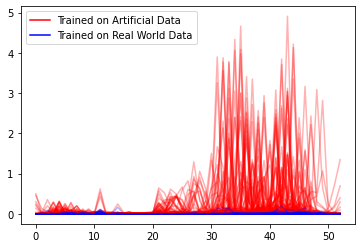

In [44]:
plotSpread(model1, model0)

In [93]:
performance2, stddev2, model2 = getMeanError(numNeurons0, numNeurons1, numNeurons2, numNeurons3, alpha0, alpha1, alpha2, alpha3, dropout, lr, loadRandomData, retMore = True)
print("Trained on purely random combinations of monoenergetic data\n", 
       "Loss = ", performance2, " ± " , stddev2 )

Trained on purely random combinations of monoenergetic data
 Loss =  0.0032758548823851575  ±  0.00014142099394209894


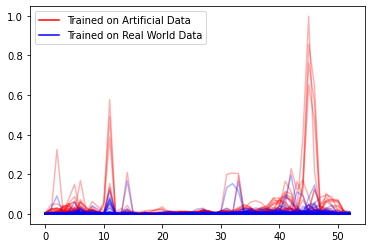

In [45]:
plotSpread(model2, model0)

In [108]:
performance3, stddev3, model3 = getMeanError(numNeurons0, numNeurons1, numNeurons2, dropout, lr, loadGaussianMonoData, retMore = True)
print("Trained on gaussian combinations of monoenergetic data\n", 
      "Loss = ", performance3, " ± " , stddev3 )

Trained on gaussian combinations of monoenergetic data
 Loss =  0.001998920976400881  ±  0.00021399746007850581


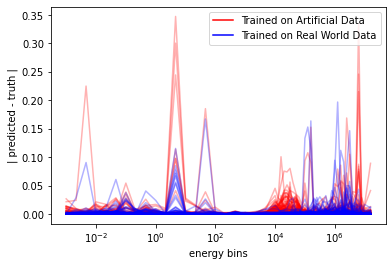

In [109]:
plotSpread(model3, model0)

In [477]:
performance4, stddev4, model4 = getMeanError(numNeurons0, numNeurons1, numNeurons2, numNeurons3, alpha0, alpha1, alpha2, alpha3, dropout, lr, loadRandomGaussianMonoData, retMore = True)
print("Trained on randomized gaussian combinations of monoenergetic data\n", 
      "Loss = ", performance4, " ± " , stddev4 )

Trained on randomized gaussian combinations of monoenergetic data
 Loss =  0.0018160259757624992  ±  0.0


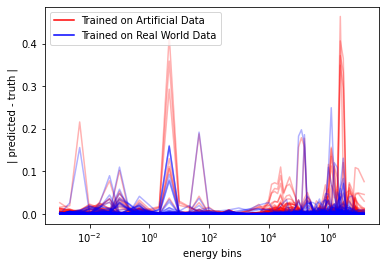

In [471]:
plotSpread(model4, model0)

# Playing Around with Optimal Model / Data Generation

In [17]:
NUM = 300
def loadRandomGaussianData(Wcenter, Wspread, Hcenter, Hspread, Nprop):
    # Randomly adds a gaussian peak to a 1D array
    def addGaussian(data, i):
        # Randomly picks the width and height of the gaussian
        # ~8 is placeholder for typical width of peak in the real-world data (depends on detector resolution)
        H = np.random.normal(loc = Hcenter, scale = Hspread)
        W = int( np.abs(np.random.normal(loc = Wcenter, scale = Wspread / (np.abs(H) + 0.01) ))) + 1

        for k in range(-W, W + 1):
            if (i + k) >= len(data):
                break
            elif (i + k) < 0:
                continue
            else:
                data[i + k] += H * np.exp(- (2.5*k/W)**2)
    
    # All of the neutron spectra are multiplied by fluences
    fluences = np.zeros(53)
    for i in range(53):
        temp = np.append(Ebins, [2.51E+07])
        fluences[i] = np.log(temp[i + 1]) - np.log(temp[i])
        
    x = np.zeros( (0, 15) )
    y = np.zeros( (0, 53) )
    #14045
    for _ in range(NUM):
        yRow = np.zeros(53)

        i = np.random.randint(low = 0, high = 54)
        addGaussian(yRow, i)
        
        # Flip a coin and keep adding gaussian spikes
        p = np.random.random()
        while p > Nprop:
            i = np.random.randint(low = 0, high = 54)
            addGaussian(yRow, i)
            p = np.random.random()
        
        yRow = np.abs(yRow)
        yRow = yRow / sum(yRow)
        xRow = np.matmul(cm, yRow)
        yRow = yRow / fluences

        x = np.vstack( (x, xRow) )
        y = np.vstack( (y, yRow) )    

    return x,y

In [212]:
def testErr(Nprop, Wspread):
    score = []
    for _ in range(2):
        NUM = 1000
        x,y = loadRandomGaussianData(Wcenter, Wspread, Hcenter, Hspread, Nprop)

        model = keras.Sequential()

        model.add(keras.Input(15))

        if numNeurons0 >= 1:
            model.add(Dropout(dropout))
            model.add(Dense(int(numNeurons0), activation=keras.layers.LeakyReLU(alpha=alpha0)))
        if numNeurons1 >= 1:
            model.add(Dropout(dropout))
            model.add(Dense(int(numNeurons1), activation=keras.layers.LeakyReLU(alpha=alpha1)))
        if numNeurons2 >= 1:
            model.add(Dropout(dropout))
            model.add(Dense(int(numNeurons2), activation=keras.layers.LeakyReLU(alpha=alpha2)))

        model.add(Dense(53, activation='linear'))
        model.compile(loss = "mse", optimizer = Adam() )

        # Sets up early stopping
        monitor = EarlyStopping(monitor='val_loss', min_delta=1e-6, 
                                patience=5, verbose=0,
                                mode='min', restore_best_weights=True)

        # Fits to the bootstrap data # , callbacks = [monitor]
        model.fit(x,y,validation_split=0.0, batch_size = 1 + int( 0.14 * len(x) ), verbose=0, epochs=300)
        print(" Stopped at : " , monitor.stopped_epoch, " epochs")
        xtest, ytest = loadXY()
        ypred = model(xtest)
        score.append( metrics.mean_squared_error(ytest, ypred) )
    print("Mean : ", np.mean(score), " ± ", np.std(score))
    return -np.mean(score)


# Optimizes the Neural Network using convoluted monoenergetic data, to simulate
# the monoenergetic data of the Geant4 Simulations

pbounds = {   'Nprop': (0.18, 0.22),
              'Wspread': (9.8, 10) }

optimizer = BayesianOptimization(
    f=testErr,
    pbounds=pbounds,
    verbose=2,
    random_state=1
)

optimizer.maximize(init_points=4, n_iter=4)

print("Best Value : " , optimizer.max)

|   iter    |  target   |   Nprop   |  Wspread  |
-------------------------------------------------
 Stopped at :  0  epochs
 Stopped at :  0  epochs
Mean :  0.00148316798376778  ±  2.1501037391511595e-05
|  1        | -0.001483 |  0.1967   |  9.944    |
 Stopped at :  0  epochs
 Stopped at :  0  epochs
Mean :  0.00156541371759356  ±  0.00011949456236917753
|  2        | -0.001565 |  0.18     |  9.86     |
 Stopped at :  0  epochs
 Stopped at :  0  epochs
Mean :  0.0013729401172523038  ±  4.519902248512899e-05
|  3        | -0.001373 |  0.1859   |  9.818    |
 Stopped at :  0  epochs
 Stopped at :  0  epochs
Mean :  0.0014278604289157761  ±  4.698839692495252e-06
|  4        | -0.001428 |  0.1875   |  9.869    |
 Stopped at :  0  epochs
 Stopped at :  0  epochs
Mean :  0.0014657322650351457  ±  0.00011731489215290102
|  5        | -0.001466 |  0.216    |  9.805    |
 Stopped at :  0  epochs
 Stopped at :  0  epochs
Mean :  0.0014070012748317428  ±  0.00010557809385839225
|  6        | 

In [297]:
# Sets all of the hyperparameters from previous optimizations

Best = {'batch_size': 0.1364029921553845, 
        'dropout': 0.004691106585818439,
        'alpha0': 0.459834683383305, 
        'alpha1': 0.015, 
        'alpha2': 0.4915779060301004, 
        'numNeurons0': 267.99747927459526, 
        'numNeurons1': 300.7563134185142, 
        'numNeurons2': 316.31031262012124}

alpha0 = Best["alpha0"]
alpha1 = Best["alpha1"]
alpha2 = Best["alpha2"]
dropout = Best["dropout"]
numNeurons0 = Best["numNeurons0"]
numNeurons1 = Best["numNeurons1"]
numNeurons2 = Best["numNeurons2"]
batch_size = Best["batch_size"]
 
BestDataP = {'Hcenter': 1.5764485342627879, 
             'Hspread': 0.7995031824171838, 
             'Nprop': 0.1858702356326845, 
             'Wcenter': 7.243589616661455, 
             'Wspread': 9.8184677189537}

Hcenter = BestDataP["Hcenter"]
Hspread = BestDataP["Hspread"]
Nprop = BestDataP["Nprop"]
Wcenter = BestDataP["Wcenter"]
Wspread = BestDataP["Wspread"]


In [298]:
#x,y = loadRandomGaussianData(Wspread, Nprop)
numNeurons0 = int(numNeurons0)
numNeurons1 = int(numNeurons1)
numNeurons2 = int(numNeurons2)

# Fits to the bootstrap data
models = []
model = None
for _ in range(1):
    model = keras.Sequential()
    model.add(keras.Input(15))
    if numNeurons0 >= 1:
        model.add(Dropout(dropout))
        model.add(Dense(numNeurons0, activation=keras.layers.LeakyReLU(alpha=alpha0)))
    if numNeurons1 >= 1:
        model.add(Dropout(dropout))
        model.add(Dense(numNeurons1, activation=keras.layers.LeakyReLU(alpha=alpha1)))
    if numNeurons2 >= 1:
        model.add(Dropout(dropout))
        model.add(Dense(numNeurons2, activation=keras.layers.LeakyReLU(alpha=alpha2)))
    model.add(Dense(53, activation='linear'))
    model.compile(loss = "mse", optimizer = Adam() )

    NUM = 2000
    for _ in range(100):
        monitor = EarlyStopping(monitor='val_loss', min_delta=1e-6, 
                            patience=2, verbose=0,
                            mode='min', restore_best_weights=True)
        x, y = loadRandomGaussianData(Wcenter, Wspread, Hcenter, Hspread, Nprop)
        model.fit(x, y, validation_split=0.1, batch_size = 1 + int( len(x) * batch_size ), callbacks=[monitor], verbose=0, epochs=10000)
    models.append(model)
    
error = []
xtest, ytest = loadXY()
for model in models:
    ypred = model(xtest)
    error.append( metrics.mean_squared_error(ytest, ypred) )
    
print( "Error : " , np.mean( error ) , " ± " , np.std( error ) )

Error :  0.0014643211816934123  ±  0.0



MSE (251) = 0.001881022179531494  ±  0.0001536092938411235
MSE (1000) = 0.0016193519840779105  ±  0.0001171341413751414
MSE (5000) = 0.001307709140041966  ±  3.3756556092440406e-05
MSE (10000) = 0.0012756532308220209  ±  1.0669471084211296e-05
